In [48]:
import random
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt

In [49]:
data_diesel = pd.read_csv('data/data_diesel.csv', sep=',')
data_diesel.head()

,diesel,year,month,day
0,302350.02,2001,7,1
1,464159.13,2001,8,1
2,321952.94,2001,9,1
3,438989.55,2001,10,1
4,440245.35,2001,11,1


### Conjuntos de entrenamiento y prueba

In [50]:
X = data_diesel[['year', 'month', 'day']]
y = data_diesel[['diesel']]
scaler = StandardScaler()
y = scaler.fit_transform(y.values.reshape(-1, 1))
X = np.asarray(X)
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
y_test = scaler.inverse_transform(y_test)
seed_value = 2302
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)
sklearn.utils.check_random_state(seed_value)

RandomState(MT19937) at 0x2AF723D40

In [51]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [52]:
modelo1 = Sequential()
lote = 1
paso = 1
caracteristicas = 3
modelo1.add(LSTM(lote, batch_input_shape=(lote, paso, caracteristicas), stateful=True))
modelo1.add(Dense(1))
modelo1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (1, 1)                    20        
                                                                 
 dense_5 (Dense)             (1, 1)                    2         
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
modelo1.compile(loss='mean_squared_error',optimizer="rmsprop")

In [54]:
epocas = 50
history = modelo1.fit(
    x = X_train,
    y = y_train,
    batch_size = lote,
    epochs = epocas,
    shuffle = False,
    validation_data = (X_test, y_test),
    verbose=1
)

Epoch 1/50
184/184 [==============================] - 1s 2ms/step - loss: 0.8231 - val_loss: 1268731478016.0000
Epoch 2/50
184/184 [==============================] - 0s 856us/step - loss: 0.7895 - val_loss: 1268731478016.0000
Epoch 3/50
184/184 [==============================] - 0s 801us/step - loss: 0.7658 - val_loss: 1268731478016.0000
Epoch 4/50
184/184 [==============================] - 0s 812us/step - loss: 0.7492 - val_loss: 1268731740160.0000
Epoch 5/50
184/184 [==============================] - 0s 901us/step - loss: 0.7376 - val_loss: 1268731740160.0000
Epoch 6/50
184/184 [==============================] - 0s 864us/step - loss: 0.7295 - val_loss: 1268731740160.0000
Epoch 7/50
184/184 [==============================] - 0s 855us/step - loss: 0.7239 - val_loss: 1268731740160.0000
Epoch 8/50
184/184 [==============================] - 0s 811us/step - loss: 0.7200 - val_loss: 1268731740160.0000
Epoch 9/50
184/184 [==============================] - 0s 799us/step - loss: 0.7173 - val_l

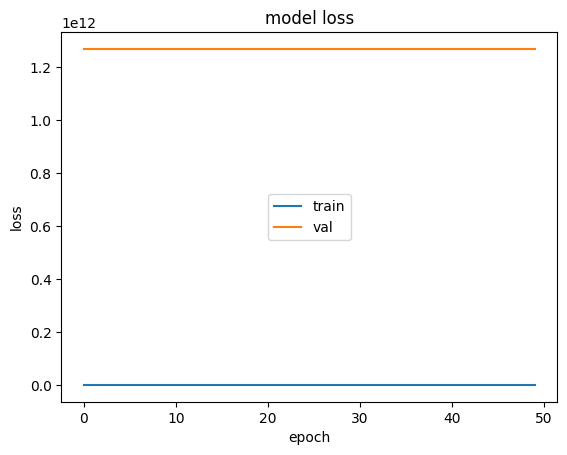

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center')